<img src="https://raw.githubusercontent.com/AkulAshray/Pandas-tutorial/main/Corndel_Logos_RGB.png" style="float: left; margin: 20px; height: 55px">
<h1 style=" font-size:1.5em; font-family:Verdana"> Data Cleaning and EDA </h1>

<hr style="border: 0.5px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In this tutorial, we will learn how to clean and explore data as part of the process of conducting exploratory data analysis (EDA). Data cleaning and EDA often go hand in hand: we perform preliminary data cleaning to allow for initial exploration, and then use the insights gained from this exploration to guide further data cleaning and processing steps. This iterative process can involve multiple rounds of data examination and refinement, making it both open-ended and dynamic.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Here, we will present a structured approach that you can follow to examine and prepare your data for analysis. The process includes the following steps:
</p>

<ol style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li><strong>Initial Cleaning:</strong> Ensure there are no null values and that the correct data types are used. This foundational step helps us accurately explore our data through visualization.</li>
    <li><strong>Summary Statistics Exploration:</strong> Understand the distribution of key variables, such as our main target variable (in this case, price). We will make further changes to our data to address issues like outliers.</li>
    <li><strong>Analysing Relationships:</strong> Examine the relationships between qualitative (categorical) and quantitative (numerical) variables to uncover insights about the data.</li>
    <li><strong>Data Preparation for Machine Learning:</strong> Use the insights from our exploration to prepare the dataset for machine learning applications, ensuring it is clean, well-structured, and ready for modeling.</li>
</ol>


<h2 style=" font-size:1.3em; font-family:Verdana"> 1. Initial Data Cleaning </h2>

<hr style="border: 0.2px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    We will begin by importing the necessary packages and loading our dataset. The data we will use for this tutorial is the Airbnb listings data, specifically the <code>London_Airbnb_Listings_March_2023.csv</code> file containing information on property listings in London.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    By the end of this tutorial, you will have a solid understanding of how to clean and explore your data, as well as how to prepare it for further analysis or machine learning applications. Let's get started!
</p>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('London_Airbnb_Listings_March_2023.csv')
data.head()

,name,host_name,latitude,longitude,host_since,host_location,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating
0,Lovely private bedroom in Muswell Hill.,Forough,51.597280,-0.139330,2015-07-20,"London, United Kingdom",NaN,Private room in condo,Private room,$100.00,1,365,30,365,0,NaN
1,Studio Flat Franklin London,Hussein,51.636518,-0.177475,2023-01-14,"London, United Kingdom",100%,Entire rental unit,Entire home/apt,$65.00,180,365,30,365,0,NaN
2,PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi,Paul,51.608180,-0.277400,2020-01-08,NaN,91%,Entire rental unit,Entire home/apt,$132.00,2,28,12,35,0,NaN
3,Wimbledon Double Bedroom Ensuite,Nikki,51.422310,-0.188410,2010-08-01,"London, United Kingdom",100%,Private room in rental unit,Private room,$100.00,5,1125,30,365,4,3.67
4,Stunning Apartment 2 minutes walk to Tube Station,Joseph,51.602282,-0.193606,2014-12-22,NaN,46%,Entire condo,Entire home/apt,$120.00,5,90,23,337,0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75241 entries, 0 to 75240
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  75210 non-null  object 
 1   host_name             75235 non-null  object 
 2   latitude              75241 non-null  float64
 3   longitude             75241 non-null  float64
 4   host_since            75236 non-null  object 
 5   host_location         59934 non-null  object 
 6   host_acceptance_rate  51028 non-null  object 
 7   property_type         75241 non-null  object 
 8   room_type             75241 non-null  object 
 9   price                 75241 non-null  object 
 10  minimum_nights        75241 non-null  int64  
 11  maximum_nights        75241 non-null  int64  
 12  availability_30       75241 non-null  int64  
 13  availability_365      75241 non-null  int64  
 14  number_of_reviews     75241 non-null  int64  
 15  review_scores_ratin

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    The output of the <code>.info()</code> method provides a concise summary of the dataset, showing that we have 75,241 entries and 16 columns. Each column's name, non-null count, and data type are listed. For instance, the <code>latitude</code> and <code>longitude</code> columns are of type <code>float64</code> and have no missing values, whereas columns like <code>host_location</code> and <code>host_acceptance_rate</code> have a significant number of null values. To ensure our analysis is focused and manageable, we will filter the dataset to include only properties located in London. This will not only streamline our data but also enhance the relevance of our analysis to a specific geographical area. Filtering the data will also reduce its size, making it easier to work with. We will also filter the columns in our DataFrame that are not relevant or amenable to analysis, like <code>host_name</code>.
</p>


In [4]:
data = data[data['host_location'] == 'London, United Kingdom']
data = data.drop(['name', 'host_name', 'host_location'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42757 entries, 0 to 75239
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              42757 non-null  float64
 1   longitude             42757 non-null  float64
 2   host_since            42757 non-null  object 
 3   host_acceptance_rate  28621 non-null  object 
 4   property_type         42757 non-null  object 
 5   room_type             42757 non-null  object 
 6   price                 42757 non-null  object 
 7   minimum_nights        42757 non-null  int64  
 8   maximum_nights        42757 non-null  int64  
 9   availability_30       42757 non-null  int64  
 10  availability_365      42757 non-null  int64  
 11  number_of_reviews     42757 non-null  int64  
 12  review_scores_rating  33605 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 4.6+ MB


<div style="background-color:#F6D277">
<p style="font-size:1.1em; font-family:Helvetica; line-height: 1.7em">
    📝 Note: You can't run the drop function twice on the same columns, as they will have already been removed and attempting to drop them again will result in an error.
</p>
</div>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    After filtering the dataset to include only properties located in London and removing unnecessary columns, we now have a more manageable dataframe with 42,757 entries and 13 columns. This filtered dataframe focuses on essential columns such as <code>latitude</code>, <code>longitude</code>, <code>host_since</code>, <code>property_type</code>, <code>room_type</code>, and <code>price</code>, among others. While this reduces the dataset's complexity, it is important to note that the index still reflects the original dataframe, with entries ranging from 0 to 75,239. In the next step, we will need to reset the index to ensure it is sequential and starts from 0, which will help maintain consistency and make the data easier to work with.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    To fix the index and ensure it is sequential and starts from 0, we use the <code>reset_index(drop=True)</code> method.
</p>

```python
data = data.reset_index(drop=True)
```
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    This command resets the index of the dataframe, dropping the old index and replacing it with a new default integer index. By setting <code>drop=True</code>, we ensure that the old index is not added as a column in the dataframe, which keeps our data clean and organized.
</p>

In [5]:
data = data.reset_index(drop=True)

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    With the index reset, we can now address some initial data cleaning tasks before diving into exploration. First, we notice that the <code>host_since</code> column, which contains dates, is stored as an object type. We should convert this to a <code>datetime</code> type and create a new column, <code>host_since_years</code>, to represent the number of years a host has been active. Additionally, the <code>price</code> column is not stored as a numerical value, so we will need to convert it to a numeric type for analysis. The columns of particular interest for our exploration include <code>property_type</code>, <code>room_type</code>, <code>price</code>, <code>minimum_nights</code>, and <code>maximum_nights</code>. Addressing these issues will prepare our data for meaningful exploration and visualization.
</p>


<h3 style=" font-size:1.2em; font-family:Verdana"> Initial Data Cleaning - Correct <code>Dtypes</code> </h3>

------

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    To begin our initial data cleaning, we will address the <code>host_since</code> column, which contains the dates when hosts started. This column is currently stored as an object, so we will convert it to a <code>datetime</code> type using the <code>pd.to_datetime()</code> function. The following code accomplishes this conversion:
</p>

```python
data['host_since'] = pd.to_datetime(data['host_since'])
data.dtypes
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
 This ensures that the dates are in the correct format for further analysis. After running this code, we can check the Dtypes of our dataframe using <code>data.dtypes</code> to confirm the changes.
</p>

In [6]:
data['host_since'] = pd.to_datetime(data['host_since'])
data.dtypes

latitude                       float64
longitude                      float64
host_since              datetime64[ns]
host_acceptance_rate            object
property_type                   object
room_type                       object
price                           object
minimum_nights                   int64
maximum_nights                   int64
availability_30                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
dtype: object

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    By converting the <code>host_since</code> column to datetime, we unlock the ability to extract more detailed information from the dates. This allows us to create new features that can enhance our analysis. For instance, we can calculate how long each host has been active by creating a new column, <code>host_since_years</code>, which represents the number of years since the host started.
</p>

```python
data['host_since_years'] = 2023 - data['host_since'].dt.year
```


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    The code accomplishes this by subtracting the year the host started from the year when the dataset was extracted, 2023. This process, known as feature engineering, involves creating new features from existing data to provide additional insights that may be useful for analysis. After running this code, we can use <code>data.head()</code> to verify the addition of the new column and ensure it contains the expected values.
</p>



In [7]:
data['host_since_years'] = 2023 - data['host_since'].dt.year
data.head()

,latitude,longitude,host_since,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,host_since_years
0,51.597280,-0.139330,2015-07-20,NaN,Private room in condo,Private room,$100.00,1,365,30,365,0,NaN,8
1,51.636518,-0.177475,2023-01-14,100%,Entire rental unit,Entire home/apt,$65.00,180,365,30,365,0,NaN,0
2,51.422310,-0.188410,2010-08-01,100%,Private room in rental unit,Private room,$100.00,5,1125,30,365,4,3.67,13
3,51.468963,-0.268780,2014-11-18,NaN,Private room in home,Private room,$500.00,30,365,30,365,0,NaN,9
4,51.379730,-0.256250,2016-09-25,0%,Entire home,Entire home/apt,$160.00,4,10,23,83,0,NaN,7


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Next, we will address the <code>price</code> column, which needs to be converted to a numerical data type for analysis. However, we notice that the values in the <code>price</code> column contain a dollar sign ('$'), which must be removed before conversion. In pandas, we can use the <code>.replace()</code> method to replace specific characters or entire values within a column. We will use this method to strip the dollar sign from the <code>price</code> values and then convert the cleaned values to a numeric type. This step is crucial for performing any numerical analysis on the pricing data. If we try to convert the column without first replacing the wrong characters, then we will encounter an error.
</p>


In [8]:
pd.to_numeric(data['price'])

ValueError: Unable to parse string "$100.00" at position 0

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    When attempting to convert the <code>price</code> column to a numeric type using <code>pd.to_numeric(data['price'])</code>, we encounter a <code>ValueError</code>.
</p>

```python
ValueError: Unable to parse string "$100.00" at position 0
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
   This error occurs because the <code>price</code> column contains dollar signs ('$'), which are non-numeric characters. It highlights the importance of cleaning the data before performing type conversions. We need to remove these dollar signs using the <code>.replace()</code> method to ensure that the values in the <code>price</code> column are purely numeric. Only then can we successfully convert the column to the correct data type for further analysis.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    This situation is similar to what we often encounter when working with data in Excel. Mistakes or unwanted characters in the data need to be corrected or removed to ensure accurate analysis. In pandas, we can use the <code>.replace()</code> function to handle such issues. This versatile function allows us to replace incorrect values or specific characters within a string. For instance, we can use it to remove the dollar signs from the <code>price</code> column by replacing them with an empty string. Additionally, the <code>.replace()</code> function can be used to replace entire values in a column, making it a powerful tool for cleaning and preprocessing data. This step ensures that all values are in the correct format and ready for further analysis.
</p>


In [9]:
# in the code below we replace $100 with £100
data['price'].replace('$100.00', '£100.00')

0        £100.00
1         $65.00
2        £100.00
3        $500.00
4        $160.00
          ...   
42752     $80.00
42753     $90.00
42754    $116.00
42755     $35.00
42756     $45.00
Name: price, Length: 42757, dtype: object

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In the example code, we use the <code>.replace()</code> function to change specific values in the <code>price</code> column. Specifically, we replace '$\$$100.00' with '£100.00'. The output shows that all occurrences of '$\$$100.00' (observe index 0 and 2) are successfully replaced with '£100.00' while other values remain unchanged. For instance, the first and third entries, originally '$\$$100.00', are now '£100.00', demonstrating how the <code>.replace()</code> function can be used to target and modify specific values within a column effectively. This technique is essential for data cleaning, ensuring that our data conforms to the desired format before further processing.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    We can also use the <code>.replace()</code> function to change multiple values at once. For example, if we have a list of values we want to replace, we can specify both the values to find and their replacements. In the code below, we define two lists: <code>find_values</code> containing the values for first five rows, and <code>replace_with</code> containing the corresponding replacements <code>'£100.00'</code>, <code>'£65.00'</code>,<code>'£500.00'</code> and <code>'£160.00'</code>. By passing these lists to the <code>.replace()</code> function, we can replace all specified values in one go:</p>

In [10]:
find_values = ['$100.00', '$65.00', '$500.00', '$160.00']
replace_with = ['£100.00', '£65.00', '£500.00', '£160.00']
data['price'].replace(find_values, replace_with)

0        £100.00
1         £65.00
2        £100.00
3        £500.00
4        £160.00
          ...   
42752     $80.00
42753     $90.00
42754    $116.00
42755     $35.00
42756     $45.00
Name: price, Length: 42757, dtype: object

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    After running this code, the <code>price</code> column will have '$\$$100.00' replaced with '£100.00', along with the other replacements in the list. This method is very efficient for making multiple replacements at once, ensuring our data is clean and consistent for further analysis.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In our case, we are primarily interested in removing specific characters within the values of the <code>price</code> column, namely the dollar sign ('$') and any commas that may be present in the thousands place. These characters need to be removed to convert the column to a numeric data type using the <code>pd.to_numeric</code> function. We can achieve this by using the <code>str.replace()</code> method twice: first to remove the dollar signs and then to remove any commas. Here is the code to do this:</p>

```python
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    The first line of code removes all dollar signs from the <code>price</code> column values, and the second line removes any commas. By applying these transformations, we ensure that the values in the <code>price</code> column are now clean and consist only of numeric characters. This preparation is essential for successfully converting the <code>price</code> column to a numeric type, which will enable us to perform further numerical analysis and operations on this data.
</p>


In [11]:
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')

In [12]:
data['price'] = pd.to_numeric(data['price'])
data.dtypes

latitude                       float64
longitude                      float64
host_since              datetime64[ns]
host_acceptance_rate            object
property_type                   object
room_type                       object
price                          float64
minimum_nights                   int64
maximum_nights                   int64
availability_30                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
host_since_years                 int64
dtype: object

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Upon examining the dataset further, we observe a similar problem with the <code>host_acceptance_rate</code> column. This column contains percentage values, which include the '%' character. To convert this column to a numeric type, we need to remove the '%' character. We can apply the same process we used for the <code>price</code> column. Here is the code to do this:</p>

```python
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%', '')
data['host_acceptance_rate'] = pd.to_numeric(data['host_acceptance_rate'])
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    The first line of code removes all '%' characters from the <code>host_acceptance_rate</code> column values. The second line then converts the cleaned values to a numeric type using the <code>pd.to_numeric</code> function. By performing these steps, we ensure that the <code>host_acceptance_rate</code> column is now numeric, enabling us to carry out further numerical analysis and operations on this data. This consistent approach to cleaning and converting data types helps maintain the integrity and usability of our dataset for subsequent analysis.
</p>


In [13]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%', '')

In [14]:
data['host_acceptance_rate'] = pd.to_numeric(data['host_acceptance_rate'])

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In summary, we have made significant progress in cleaning and preparing our dataset for analysis. The steps we have taken so far include:
</p>

<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li>Filtered the dataset to focus on London properties.</li>
    <li>Removed unnecessary columns to simplify our analysis.</li>
    <li>Reset the index to ensure it is sequential and starts from 0.</li>
    <li>Converted the <code>host_since</code> column to datetime and created a new <code>host_since_years</code> column.</li>
    <li>Cleaned and converted the <code>price</code> column to a numeric type by removing dollar signs and commas.</li>
    <li>Cleaned and converted the <code>host_acceptance_rate</code> column to a numeric type by removing percentage signs.</li>
</ul>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Comparing the new output of the <code>.info()</code> method, we can see that our dataset now has 42,757 entries and 14 columns, with appropriate data types assigned to each column:
</p>

<pre><code>&lt;class 'pandas.core.frame.DataFrame'&gt;
RangeIndex: 42757 entries, 0 to 42756
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   latitude              42757 non-null  float64       
 1   longitude             42757 non-null  float64       
 2   host_since            42757 non-null  datetime64[ns]
 3   host_acceptance_rate  28621 non-null  float64       
 4   property_type         42757 non-null  object        
 5   room_type             42757 non-null  object        
 6   price                 42757 non-null  float64       
 7   minimum_nights        42757 non-null  int64         
 8   maximum_nights        42757 non-null  int64         
 9   availability_30       42757 non-null  int64         
 10  availability_365      42757 non-null  int64         
 11  number_of_reviews     42757 non-null  int64         
 12  review_scores_rating  33605 non-null  float64       
 13  host_since_years      42757 non-null  int64         
dtypes: datetime64 , float64(5), int64(6), object(2)
memory usage: 4.6+ MB
</code></pre>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Our next step is to address the null values present in certain columns, such as <code>host_acceptance_rate</code> and <code>review_scores_rating</code>.
</p>

<h3 style=" font-size:1.2em; font-family:Verdana"> Initial Data Cleaning - Dealing with <code>Nulls</code> </h3>

------

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Handling null values is essential for maintaining the accuracy and integrity of our analysis. Pandas provides several functions to deal with null values effectively. First, we can use the <code>isna()</code> function to <strong>identify</strong> null values and the <code>notna()</code> function to identify non-null values. To get an overview of how many null values are present in each column, we can use <code>data.isna().sum()</code>, which will give us a count of nulls per column.
</p>

```python
data.isna().sum()
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Once we know where the null values are, we have several options for <strong>handling</strong> them. The <code>drop()</code> function can be used to remove rows or columns with null values, which is useful when we have a significant amount of missing data in a particular column. On the other hand, the <code>fillna()</code> function allows us to replace null values with a specified value, such as the mean or median of the column, or a constant value. This approach is useful when we believe the missing values are not random and can be reasonably imputed.
</p>


In [15]:
# to identify which columns have null values
data.isna().sum()

latitude                    0
longitude                   0
host_since                  0
host_acceptance_rate    14136
property_type               0
room_type                   0
price                       0
minimum_nights              0
maximum_nights              0
availability_30             0
availability_365            0
number_of_reviews           0
review_scores_rating     9152
host_since_years            0
dtype: int64


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    The output provides a count of null values in each column of our listings dataset. Here, we can see that the columns <code>host_acceptance_rate</code> and <code>review_scores_rating</code> have 14,136 and 9,152 null values respectively, while other columns do not contain any null values. This insight helps us understand where our data may need cleaning or imputation. 
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    To further investigate these null values, we can use the <code>isna()</code> function to filter and display only the rows where a specific column contains null values. For example, if we want to see all rows where the <code>review_scores_rating</code> is null, we can use the following code:</p>


In [16]:
data[data['review_scores_rating'].isna()]

,latitude,longitude,host_since,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,host_since_years
0,51.597280,-0.139330,2015-07-20,NaN,Private room in condo,Private room,100.0,1,365,30,365,0,NaN,8
1,51.636518,-0.177475,2023-01-14,100.0,Entire rental unit,Entire home/apt,65.0,180,365,30,365,0,NaN,0
3,51.468963,-0.268780,2014-11-18,NaN,Private room in home,Private room,500.0,30,365,30,365,0,NaN,9
4,51.379730,-0.256250,2016-09-25,0.0,Entire home,Entire home/apt,160.0,4,10,23,83,0,NaN,7
6,51.613680,-0.124160,2012-07-02,63.0,Private room in home,Private room,75.0,1,1125,29,89,0,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42741,51.492840,-0.248000,2018-03-21,75.0,Room in boutique hotel,Hotel room,220.0,1,1125,30,365,0,NaN,5
42742,51.535960,-0.064360,2012-11-12,NaN,Private room in home,Private room,39.0,4,1125,0,0,0,NaN,11
42746,51.475740,0.057330,2012-04-07,NaN,Private room in rental unit,Private room,150.0,1,1125,30,365,0,NaN,11
42747,51.564810,-0.114050,2016-04-29,100.0,Entire rental unit,Entire home/apt,160.0,5,365,5,293,0,NaN,7


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    This command filters the dataframe to include only the rows where the <code>review_scores_rating</code> is null, allowing us to examine these cases more closely. When we examine the filtered DataFrame, we notice that whenever the number_of_reviews is 0 the review_scores_rating is null, or atleast it seems to be the case in the 10 rows shown on display. 
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    This command filters the dataframe to include only the rows where the <code>review_scores_rating</code> is null, allowing us to examine these cases more closely. When we examine the filtered DataFrame, we notice that whenever the <code>number_of_reviews</code> is 0, the <code>review_scores_rating</code> is null, or at least it seems to be the case in the 10 rows shown on display. This pattern suggests that properties without any reviews do not have a review score, which is a logical explanation for these null values.

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In this case, we have a couple of options for handling the null values. One approach is to drop the rows with null <code>review_scores_rating</code> values using the <code>.notna()</code> method to filter them out of our data, as shown in the following code:</p>

In [17]:
data[data['review_scores_rating'].notna()]

,latitude,longitude,host_since,host_acceptance_rate,property_type,room_type,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,host_since_years
2,51.422310,-0.188410,2010-08-01,100.0,Private room in rental unit,Private room,100.0,5,1125,30,365,4,3.67,13
5,51.634380,-0.158060,2013-07-28,100.0,Entire home,Entire home/apt,379.0,3,1125,23,358,2,5.00,10
7,51.406550,-0.260040,2016-10-09,78.0,Private room in home,Private room,45.0,1,365,24,358,11,4.73,7
9,51.446670,-0.239790,2017-01-15,92.0,Private room in casa particular,Private room,100.0,1,30,0,249,9,4.67,6
15,51.605500,-0.142420,2022-02-15,99.0,Entire condo,Entire home/apt,167.0,2,1125,24,326,32,4.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42751,51.565063,-0.135609,2013-08-02,100.0,Entire condo,Entire home/apt,159.0,4,90,3,21,5,4.80,10
42752,51.443590,-0.205300,2021-12-13,80.0,Entire rental unit,Entire home/apt,80.0,1,365,11,279,16,4.94,2
42753,51.536560,-0.022040,2012-09-24,0.0,Entire loft,Entire home/apt,90.0,5,60,0,0,1,5.00,11
42754,51.469360,-0.126080,2014-05-30,54.0,Entire rental unit,Entire home/apt,116.0,3,30,0,8,19,4.84,9


<div style="background-color:#F6D277">
<p style="font-size:1.1em; font-family:Helvetica; line-height: 1.7em">
    📝 Note: Running the above code, filters the data to show only the rows where the column values is not null, but it does not change the actual dataframe because the filtered result is not saved to a variable. 
</p>
</div>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    If you want to save the filtered data and update the original dataframe, you need to assign it back to the dataframe like this: 
</p>
    
```python
    data = data[data['review_scores_rating'].notna()]
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    However, dropping these rows might lead to a loss of potentially useful information about the properties that have not received any reviews. An alternative approach is to fill the null values with a specific value, such as -1, to indicate the absence of reviews while retaining these rows in the dataset. The choice of -1 is arbitrary but meaningful in this context as it is unlikely to be confused with legitimate review scores, clearly signaling that these properties have no reviews. This approach allows us to preserve the entire dataset for further analysis while maintaining the information about properties lacking reviews:</p>

In [18]:
data['review_scores_rating'] = data['review_scores_rating'].fillna(-1)

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    To summarise filling the null values with -1, we ensure that the <code>review_scores_rating</code> column contains no missing values, which simplifies subsequent analysis and modeling tasks. It retains the full scope of our data, enabling a more comprehensive understanding of the properties listed on Airbnb.
</p>


<h3 style=" font-size:1.2em; font-family:Verdana"> Dealing with <code>Nulls</code> - Summary </h3>

------

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Deciding how to handle null values often depends on subject matter knowledge and the specific context of the project. For example, in the case of the <code>host_acceptance_rate</code> column, we will fill the null values with the mean value of 84.01. This can be done using the following code:</p>

In [19]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].fillna(84.01)

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    While this method works for demonstration purposes, in real-world scenarios, handling missing data is often more complex. The appropriate strategy depends on various factors such as the <strong> goals of the project, the importance of the data, the distribution of missing values, and stakeholder requirements</strong>. Subject matter knowledge is crucial in making these decisions, as it helps to understand the implications of different methods on the analysis and the validity of the results. In practice, one may consult with domain experts or stakeholders to choose the best approach for dealing with null values.
</p>

<h2 style=" font-size:1.3em; font-family:Verdana"> 2. Summary Statistics Exploration </h2>

<hr style="border: 0.2px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    With our data cleaned and preprocessed, we can now move on to exploring summary statistics. Summary statistics provide a quick overview of the central tendencies, dispersion, and shape of the distribution of our data. In pandas, the <code>.describe()</code> function is a powerful tool that generates a variety of summary statistics for numerical columns, such as the count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th (median), and 75th percentiles. Exploring the summary statistics, gives us insights into the overall distribution of data, identify possible outliers, and set the stage for more detailled analysis and visualisation.
</p>


In [20]:
data.describe()

,latitude,longitude,host_acceptance_rate,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,host_since_years
count,42757.000000,42757.000000,42757.000000,42757.000000,42757.000000,4.275700e+04,42757.000000,42757.000000,42757.000000,42757.000000,42757.000000
mean,51.510948,-0.126751,83.300638,187.151858,5.798840,1.309212e+04,6.521973,101.413406,21.202914,3.421870,7.834951
std,0.046027,0.089250,20.044322,577.010767,21.643039,2.538717e+06,9.659689,127.238977,46.753001,2.398051,2.484559
min,51.296850,-0.496760,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,51.484680,-0.186514,84.010000,60.000000,2.000000,3.600000e+01,0.000000,0.000000,1.000000,3.670000,7.000000
50%,51.514520,-0.124340,84.010000,100.000000,3.000000,3.650000e+02,0.000000,30.000000,5.000000,4.710000,8.000000
75%,51.540180,-0.069346,98.000000,180.000000,4.000000,1.125000e+03,11.000000,194.000000,20.000000,4.970000,9.000000
max,51.674220,0.278960,100.000000,70111.000000,1124.000000,5.248556e+08,30.000000,365.000000,1247.000000,5.000000,15.000000


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    It is important to note that the <code>.describe()</code> function primarily provides summary statistics for quantitative (numerical) variables. While it offers a comprehensive overview of these variables, it does not automatically include qualitative (categorical) variables in its output.
    
</p>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
If we want to examine the summary statistics of a specific numerical column, such as <code>price</code>, we can do so individually using:
</p>

```python
data['price'].describe()
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    This targeted approach can be particularly useful when we are interested in exploring the distribution and key metrics of a specific variable in greater depth. When we run <code>data['price'].describe()</code>, we receive a series of summary statistics for the <code>price</code> column. The output provides several key metrics:</p>

<pre><code>
count    42757.000000 <span style="color:#db4444;">-> total number of non-null entries</span>
mean       187.151858 <span style="color:#db4444;">-> the average price of the properties</span>
std        577.010767 <span style="color:#db4444;">-> spread around mean of the price values</span>
min          0.000000 <span style="color:#db4444;">-> the minimum price</span>
25%         60.000000 <span style="color:#db4444;">-> 25% of the listings have a price of 60 or less</span>
50%        100.000000 <span style="color:#db4444;">-> half of the listings have a price of 100 or less</span>
75%        180.000000 <span style="color:#db4444;">-> 75% of the listings have a price of 180 or less</span>
max      70111.000000 <span style="color:#db4444;">-> revealing the highest price</span>
Name: price, dtype: float64
</code></pre>


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    These statistics provide a comprehensive summary of the distribution of prices in our dataset. Notably, there is a significant gap between the 75th percentile (180) and the maximum value (70,111), indicating that the distribution of prices is heavily skewed by extreme outliers. This skewness can distort our analysis and make it difficult to interpret the central tendencies and spread of the data. We can visually inspect the impact of this skewness by plotting a histogram as shown below. 
</p>

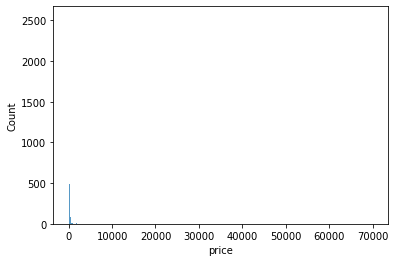

In [21]:
sns.histplot(data['price']);

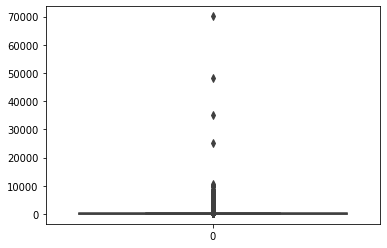

In [22]:
sns.boxplot(data['price']);

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
Since price is our main target variable for analyzing other factors, we might choose to filter out all prices above 180 to mitigate the effect of outliers. By re-plotting the distribution after this filtering, we can better understand the underlying patterns and trends in the data, leading to more accurate and meaningful analysis.
</p>


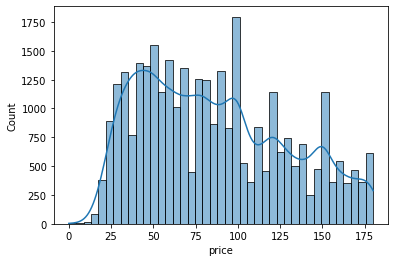

In [23]:
data_filtered = data[data['price'] <= 180]
sns.histplot(data_filtered['price'], kde=True);

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    This code creates a new dataframe, <code>data_filtered</code>, containing only the rows where the price is 180 or less.
</p>

```python
data_filtered = data[data['price'] <= 180]
```

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    By plotting a histogram of the <code>price</code> column from this filtered dataset, we can visualize the distribution without the influence of extreme outliers. The resulting histogram shows a more concentrated and interpretable distribution of prices, allowing us to see the common price ranges more clearly. 
</p>



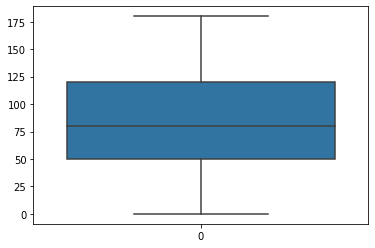

In [24]:
sns.boxplot(data_filtered['price']);

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    By applying the same approach, we can examine the distribution of other quantitative variables in the dataset, both for the filtered and unfiltered data. Plotting histograms or box plots for these variables will help identify patterns, trends, and potential outliers. Making notes on the distribution of each variable is crucial for understanding the dataset's overall structure and preparing for more advanced analyses. To further enhance your understanding of distributions and summary statistics, here are a few recommended resources:
</p>

<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li><a href="https://www.quanthub.com/exploring-distributions-in-data-analysis/" target="_blank">Exploring  Distributions in Data Analysis</a></li>
    <li><a href="https://datasciencedojo.com/blog/types-of-statistical-distributions-in-ml/" target="_blank">Types of Statistical Distribution</a></li>
    <li><a href="https://rafalab.dfci.harvard.edu/dsbook/summary-statistics.html" target="_blank">Statistics for Data Science: An Introduction to Summary Statistics</a></li>
</ul>


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In the next section, we will focus on analyzing the relationship between price and other variables. To maintain clarity and depth in our analysis, we will explore the filtered data with <strong>'price'</strong> less than or equal to 180.
</p>


In [25]:
data = data[data['price'] <= 180]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32161 entries, 0 to 42756
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   latitude              32161 non-null  float64       
 1   longitude             32161 non-null  float64       
 2   host_since            32161 non-null  datetime64[ns]
 3   host_acceptance_rate  32161 non-null  float64       
 4   property_type         32161 non-null  object        
 5   room_type             32161 non-null  object        
 6   price                 32161 non-null  float64       
 7   minimum_nights        32161 non-null  int64         
 8   maximum_nights        32161 non-null  int64         
 9   availability_30       32161 non-null  int64         
 10  availability_365      32161 non-null  int64         
 11  number_of_reviews     32161 non-null  int64         
 12  review_scores_rating  32161 non-null  float64       
 13  host_since_years

<h2 style=" font-size:1.3em; font-family:Verdana"> 3. Analysing Relationships </h2>

<hr style="border: 0.2px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Before creating any plot, it’s important to understand the type of data we are working with. This understanding is crucial because different types of data require different approaches for analysis and visualisation. We call these data types "feature types" or "variable types." Identifying the correct feature type helps ensure that we use appropriate statistical methods and visualisation techniques, leading to more accurate and insightful analysis. Broadly speaking, we can categorise features (variables) into one of two overarching types.
</p>

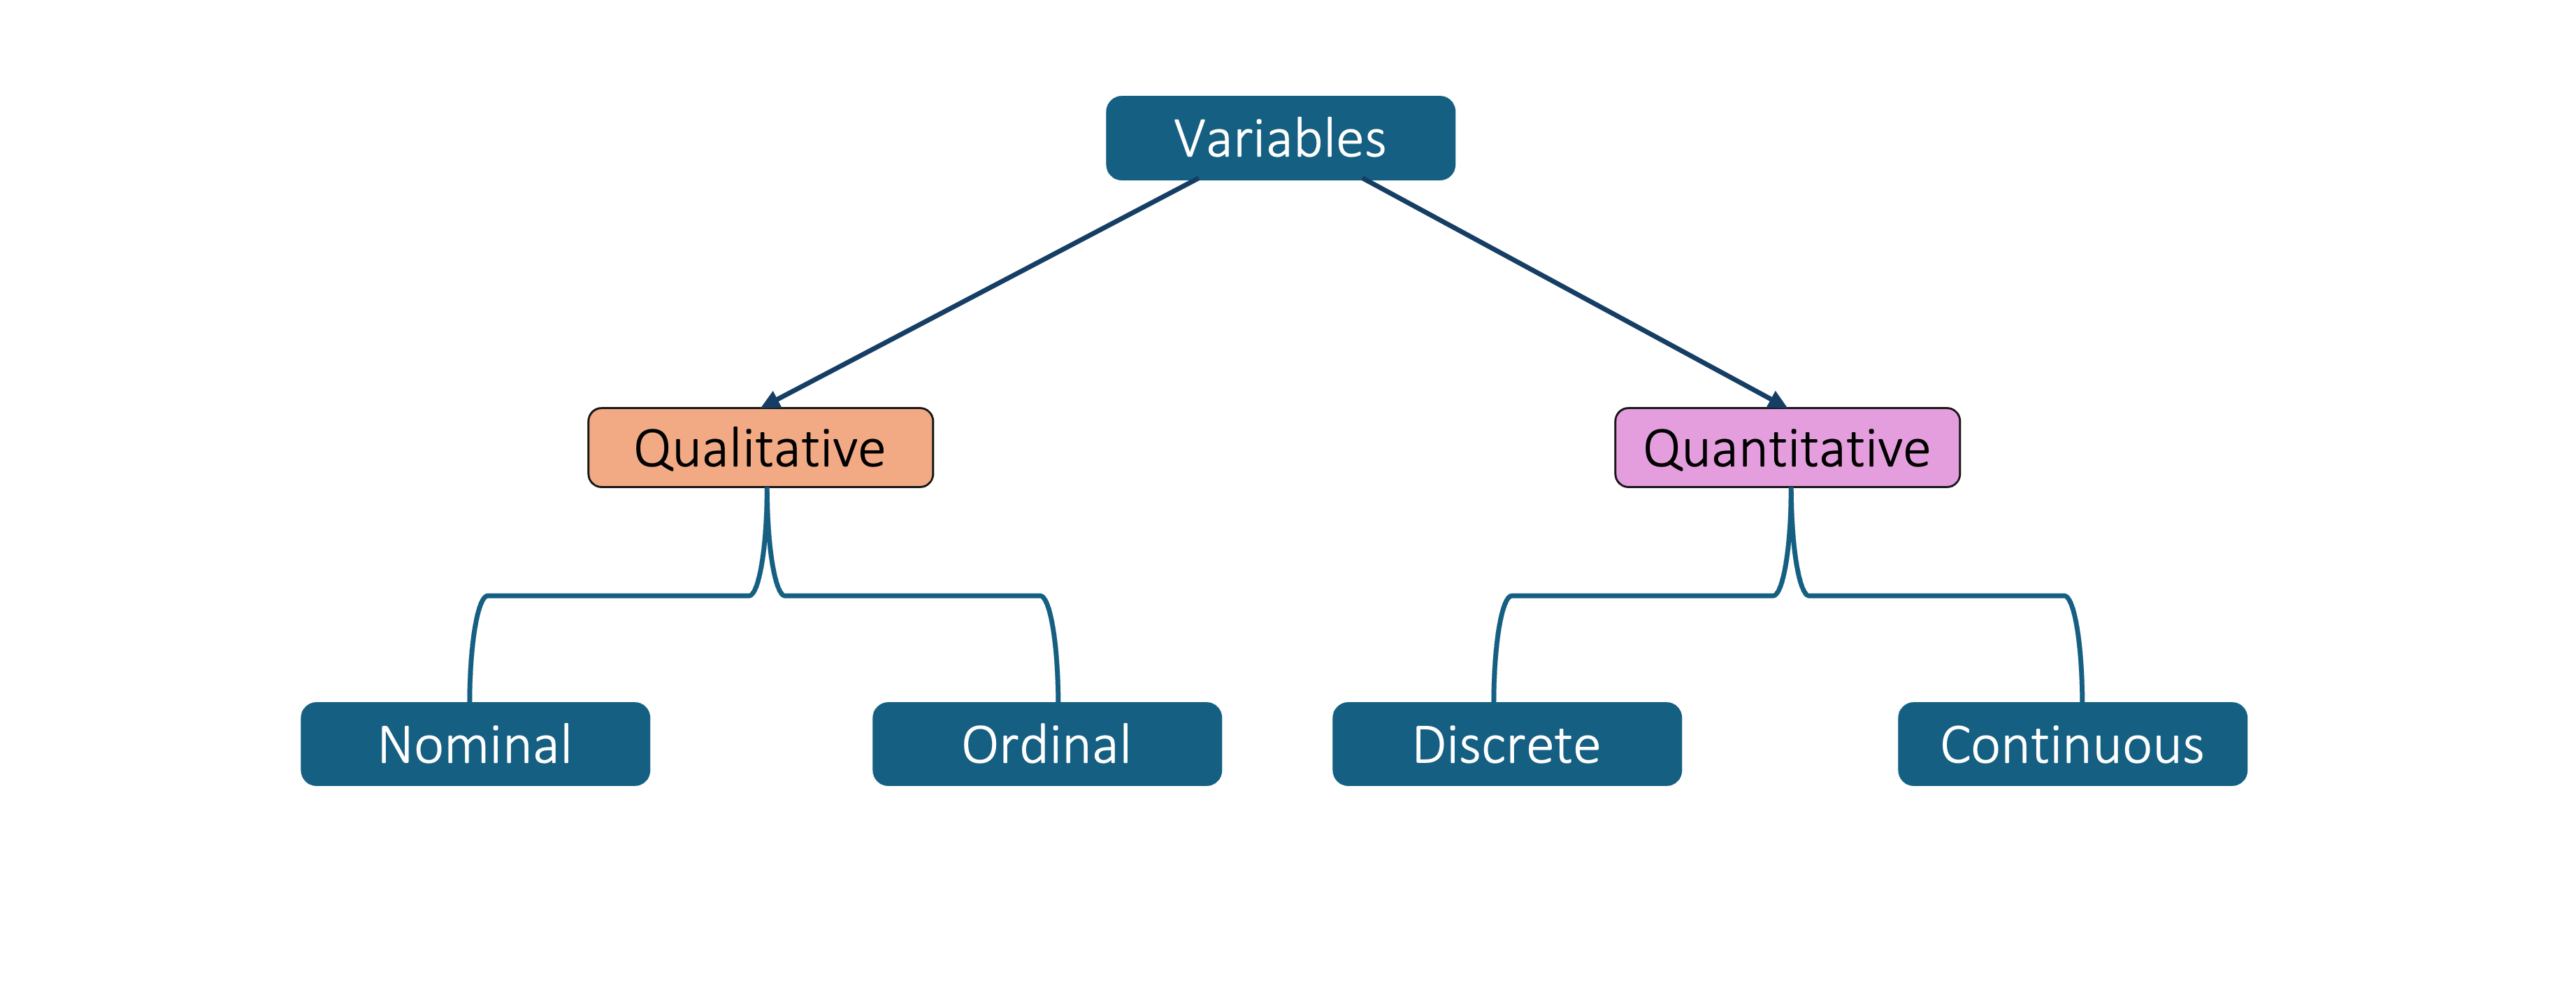


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <strong>Qualitative variables</strong>, also known as categorical variables, describe data that isn’t measuring some quantity or amount. The sub-categories of categorical data are:
</p>

<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.6em">
    <li><strong>Nominal features</strong> represent categories without any natural order. Examples include:
        <ul style="font-size:1 em; font-family:Helvetica; line-height: 1.7em; margin-top: 0.5em;">
            <li>Party Membership (e.g., Conservatives, Labour, Lib Dem, Other)</li>
            <li>Pet (e.g., Dog, Cat, Hamster, Sparrow)</li>
            <li>Operating systems (e.g., Windows, macOS, Linux)</li>
        </ul>
    </li>
    <li><strong>Ordinal features</strong> represent ordered categories. Examples include:
        <ul style="font-size:1 em; font-family:Helvetica; line-height: 1.7em; margin-top: 0.5em;">
            <li>T-shirt sizes (e.g., small, medium, large)</li>
            <li>Survey responses (e.g., disagree, neutral, agree)</li>
            <li>Levels of education (e.g., high school, college, graduate school)</li>
        </ul>
    </li>
</ul>

</br>
<div style="background-color:#F6D277">
<p style="font-size:1.1em; font-family:Helvetica; line-height: 1.7em">
    📝 Note: The difference between categories may not be equal or measurable. For example, the jump from small to medium may not be the same as from medium to large.
</p>
</div>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <strong>Quantitative variables</strong> are numeric measurements. They can be:
</p>
<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li><strong>Discrete:</strong> Only certain values are possible, like the number of siblings (e.g., 0, 1, 2).</li>
    <li><strong>Continuous:</strong> Can take any value within a range, like height (e.g., 170.5 cm).</li>
</ul>

<h3 style="font-size:1.2em; font-family:Verdana">Date-Time Features</h3>

-----
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Date-time features represent points in time or durations and are considered a special type of quantitative variable. They allow for operations like addition, subtraction, and comparison. Examples include:
</p>
<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li>Dates (e.g., 2023-07-19)</li>
    <li>Timestamps (e.g., 2023-07-19 12:45:00)</li>
    <li>Durations (e.g., 5 days, 3 hours)</li>
</ul>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In pandas, date-time values are typically stored as <code>datetime64</code> objects, which enable powerful date-time manipulation functions.
</p>

<h3 style="font-size:1.2em; font-family:Verdana">Variable Types vs. Data Storage Types</h3>

---
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Variable types are about the kind of information, while data storage types are about how the computer stores that information. In a pandas dataframe, storage types include:
</p>
<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li>Integer</li>
    <li>Floating point</li>
    <li>Boolean</li>
    <li>Date-time format</li>
    <li>Category</li>
    <li>Object (for strings)</li>
</ul>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    For example, an integer column can represent nominal data, strings can represent quantitative data (like    100.00), and boolean values often represent nominal features with two possible values.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <strong>Note:</strong> pandas calls the storage type <code>dtype</code>, which is short for data type. We refrain from using the term data type here because it can be confused with both storage type and feature type.
</p>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    To determine a variable type, we often need to consult a dataset’s data dictionary. A data dictionary is a document included with the data that describes what each column in the data table represents.
</p>

<h3 style="font-size:1.2em; font-family:Verdana">One Qualitative and One Quantitative Variable</h3>

---

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    To examine the relationship between a quantitative and a qualitative feature, we typically divide the data into groups based on the qualitative feature and then compare the distribution of the quantitative feature across these groups. For example, we can analyze the distribution of price across the different room types to see how price varies within different categories of room type, providing valuable insights into their relationship.
</p>

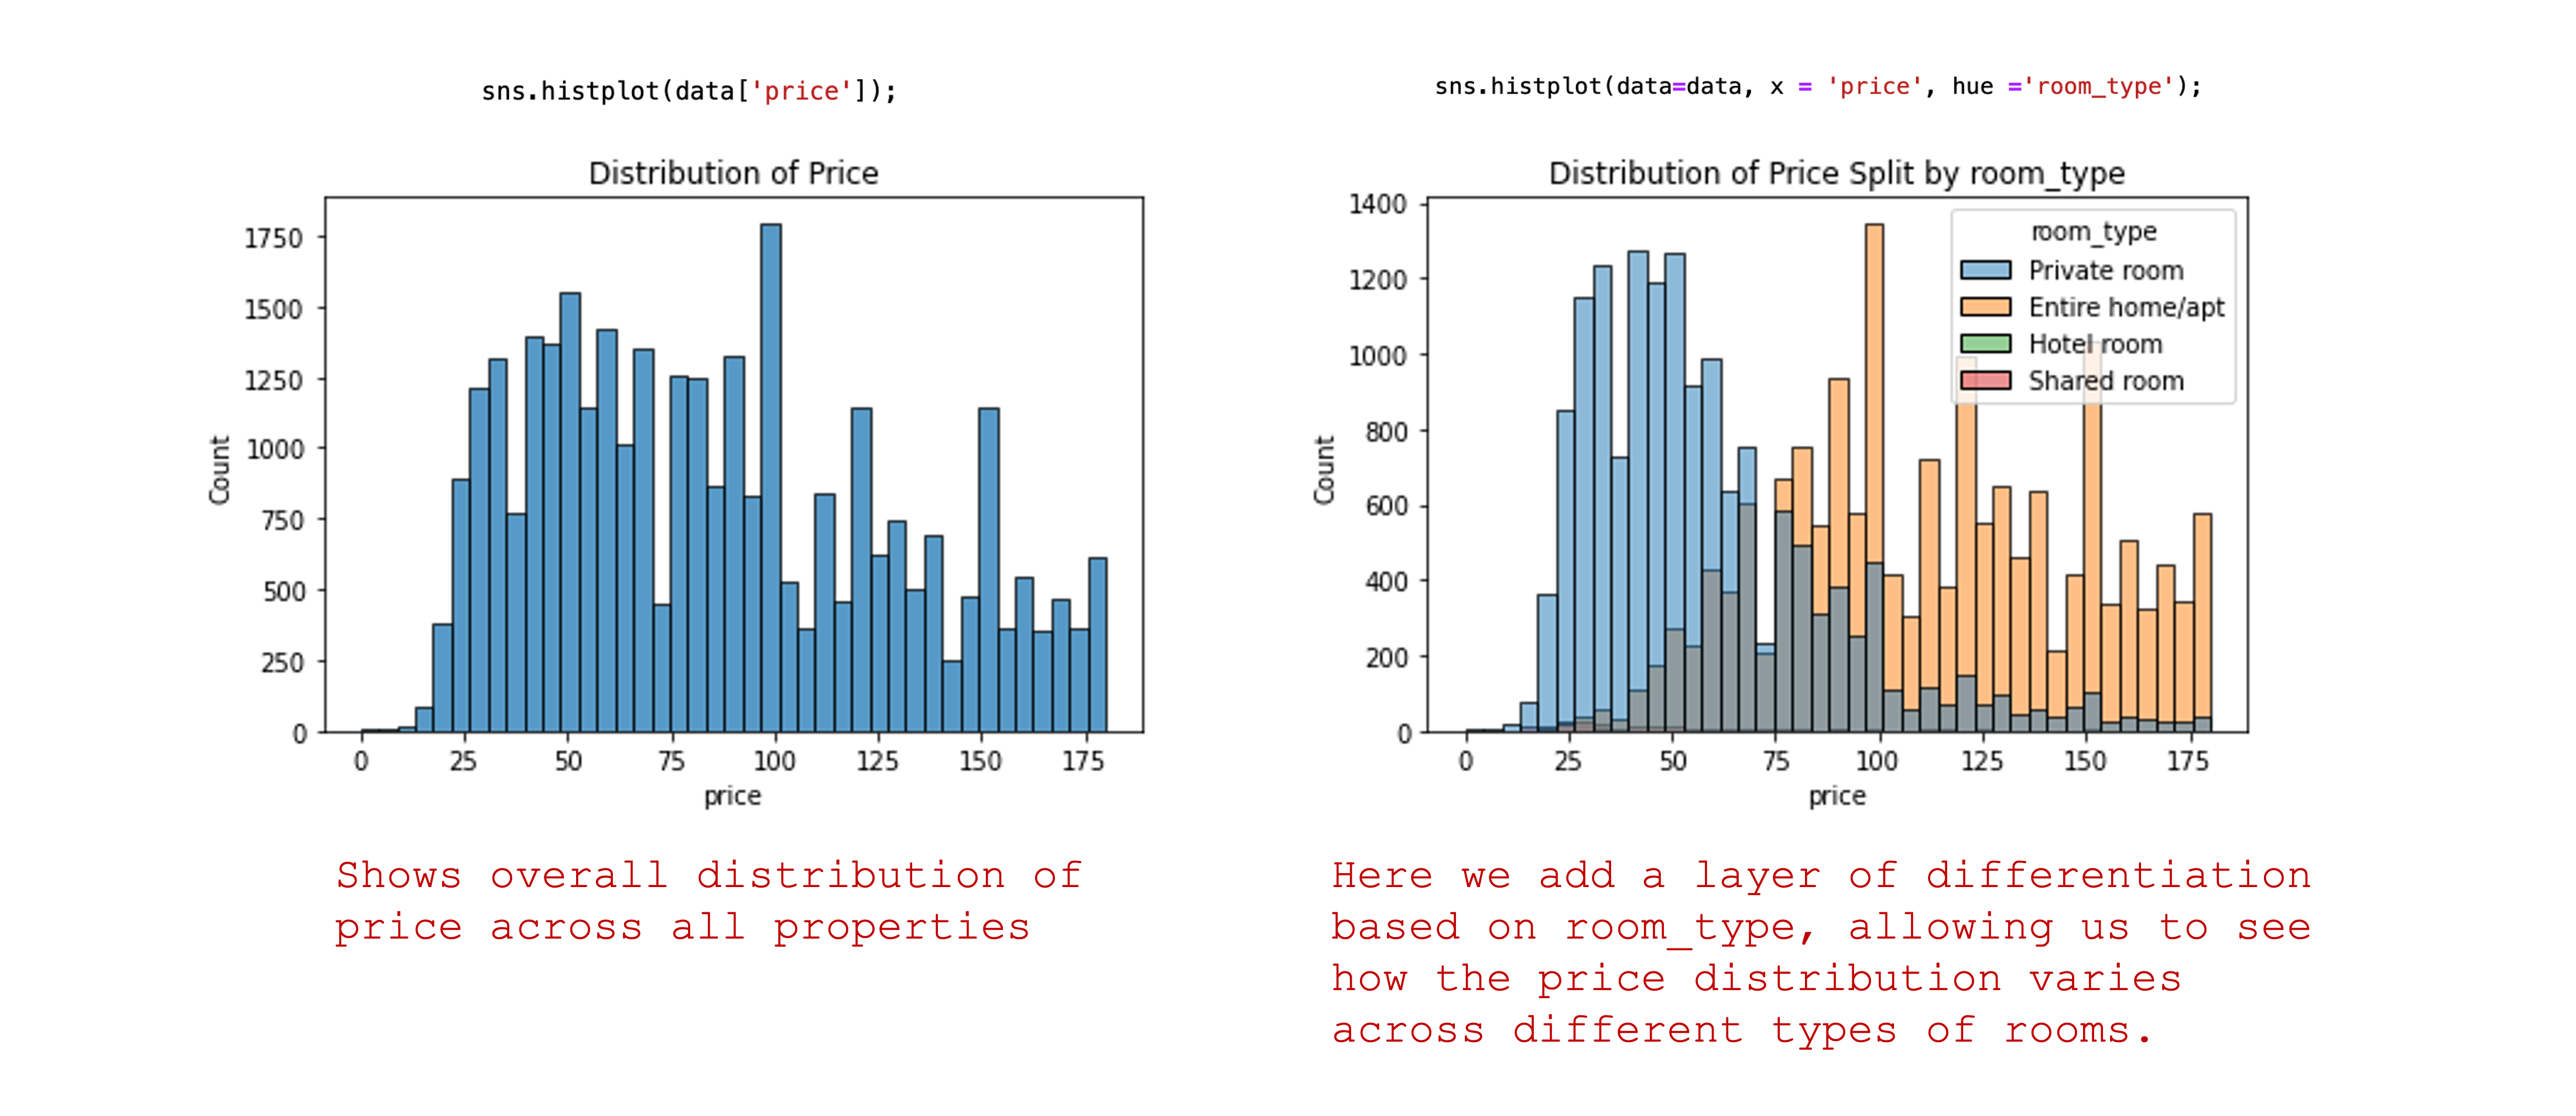

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    When we look at the distribution broken down by room type, we can clearly identify that private rooms are often distributed at a lower price range, whereas entire home/apartment types are higher priced. We can also visualize this using a box plot.
</p>

<AxesSubplot: xlabel='room_type', ylabel='price'>

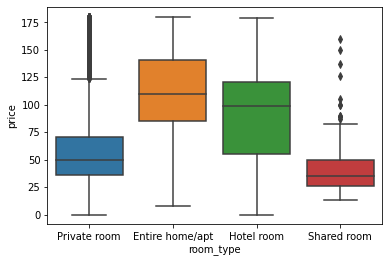

In [26]:
sns.boxplot(data=data,
            x = 'room_type',
            y ='price')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    If we plot a boxplot of <code>review_scores_rating</code> broken down by room type, we don't notice a striking difference in the distribution between the different room types. Unlike the clear differentiation observed with price, the review scores rating appears to be fairly consistent across all room types. This indicates that while room type may have a significant effect on price (we need to carry out statistics to be sure), it does not have a visible impact on the review scores rating. This insight suggests that factors other than room type are influencing the review scores left by guests.
</p>


<AxesSubplot: xlabel='room_type', ylabel='review_scores_rating'>

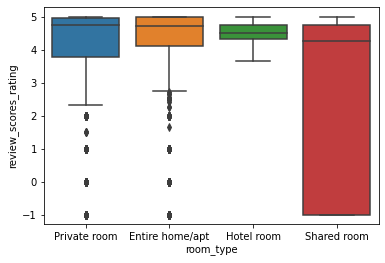

In [27]:
sns.boxplot(data=data,
            x = 'room_type',
            y ='review_scores_rating')

<div style="background-color:#F6D277">
<p style="font-size:1.1em; font-family:Helvetica; line-height: 1.7em">
    📝 Note: While observing the box plot for review scores rating, remember that we previously filled null values with -1. This can be seen in the boxplot (above) and the histplot (below) and may affect the interpretation of the data.
</p>
</div>

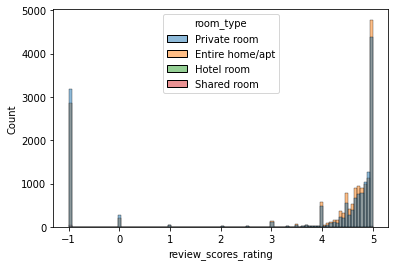

In [28]:
sns.histplot(data= data,
            x='review_scores_rating',
            hue='room_type');

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    You are free to create similar plots to visualize and inspect the relationship between <code>room_type</code> and other numerical variables in the dataset. This will help deepen your understanding of how different factors interact with each other and influence various aspects of the data. By experimenting with different plots and variables, you can uncover additional insights and patterns that might not be immediately apparent.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Next we will explore the relationship between two quantitative variables, allowing us to analyse how one numerical feature varies with another and identify potential correlations or trends.
</p>

<h3 style="font-size:1.2em; font-family:Verdana">Two Quantitative Variables</h3>

---

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    When both features are quantitative, we often examine their relationship using a scatter plot. Each point in a scatter plot represents the position of a pair of values for a single observation. Scatter plots are particularly useful for identifying linear and simple nonlinear relationships between variables and assessing the strength of these relationships. Additionally, they can help us determine if a transformation of one or both features might reveal a linear relationship.
</p>


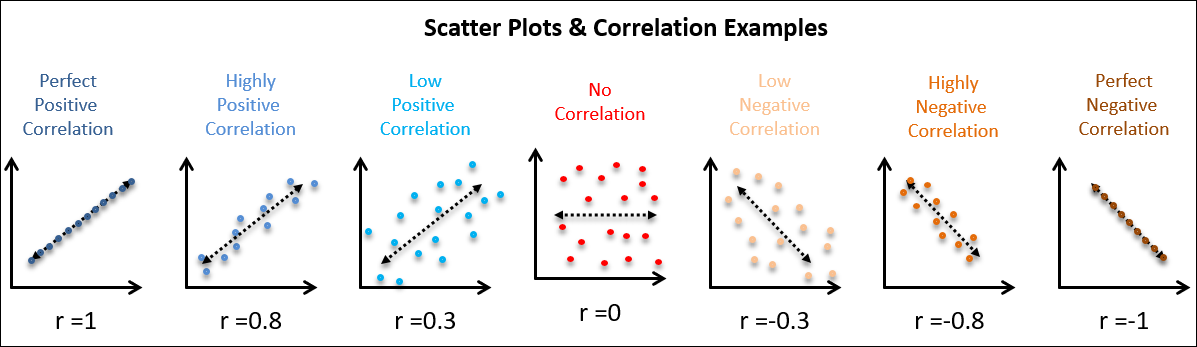

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    We begin by first plotting a scatterplot of review_scores_rating and price, to examine if there is any relationship between them.
</p>



<AxesSubplot: xlabel='review_scores_rating', ylabel='price'>

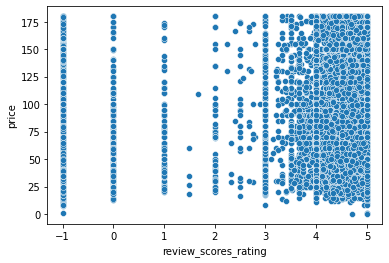

In [29]:
sns.scatterplot(data=data, x='review_scores_rating', y ='price')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    When we observe the scatter plot for <code>review_score_rating</code> and <code>price</code>, it may initially seem that there is no clear relationship. This is a common occurrence in real-world datasets, especially large ones like ours, which contain over 30,000 rows and a wide variety of properties. The scatter plot may not always reveal an obvious relationship due to this diversity.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    In some situations, it can be helpful to plot only a small sample of the data to avoid overwhelming the plot with too many points. For instance, using the following code, we can create a scatter plot with a sample of 500 rows:</p>

<AxesSubplot: xlabel='price', ylabel='review_scores_rating'>

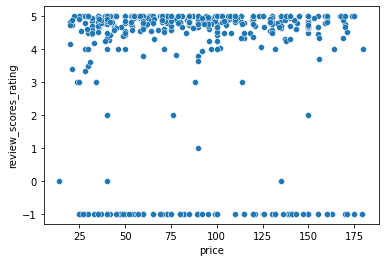

In [30]:
sns.scatterplot(data=data.sample(500), x='price', y='review_scores_rating')

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Even with this limited plot, we might not see an obvious relationship. Before plotting any additional variables, it is often beneficial to first check the correlations between the numerical features. We can do this using the <code>.corr()</code> function, which provides a correlation matrix to help us identify potential relationships between different numerical variables.
</p>

In [31]:
# create a list with only the features we want to investigate
features_of_interest = ['price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'host_since_years']

# filter the data using the features_of_interest before applying .corr function
data[features_of_interest].corr()

,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,host_since_years
price,1.000000,0.015682,-0.007926,0.147698,0.160931,-0.037251,0.043877,-0.019643
minimum_nights,0.015682,1.000000,-0.001184,0.043504,0.064367,-0.019415,-0.025805,0.015711
maximum_nights,-0.007926,-0.001184,1.000000,0.000373,0.011398,0.023591,0.002254,0.000097
availability_30,0.147698,0.043504,0.000373,1.000000,0.648929,0.033367,-0.018292,-0.170163
availability_365,0.160931,0.064367,0.011398,0.648929,1.000000,0.087463,0.016606,-0.169961
number_of_reviews,-0.037251,-0.019415,0.023591,0.033367,0.087463,1.000000,0.236611,0.095048
review_scores_rating,0.043877,-0.025805,0.002254,-0.018292,0.016606,0.236611,1.000000,0.075664
host_since_years,-0.019643,0.015711,0.000097,-0.170163,-0.169961,0.095048,0.075664,1.000000


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    We will cover correlation in detail in Unit 5. For now, it is important to understand that applying the <code>.corr()</code> function provides the correlation coefficient between variables. This coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. The <code>.corr()</code> function calculates the pairwise correlations between all specified columns. To focus our analysis, we can filter the <code>.corr()</code> results to show only the correlations related to the <code>price</code> column and sort the values in descending order.
</p>

In [32]:
data[features_of_interest].corr()['price'].sort_values(ascending=False)

price                   1.000000
availability_365        0.160931
availability_30         0.147698
review_scores_rating    0.043877
minimum_nights          0.015682
maximum_nights         -0.007926
host_since_years       -0.019643
number_of_reviews      -0.037251
Name: price, dtype: float64

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    This output shows the correlation coefficients between <code>price</code> and other numerical variables in the dataset. Although none of the correlations are particularly strong, we can focus on the top three: <code>availability_365</code>, <code>availability_30</code>, and <code>review_scores_rating</code>. Even though these relationships are relatively weak, we can still explore them further. In Unit 5, we will use regression analysis to numerically express the relationship between these variables and <code>price</code>, providing a more detailed understanding of how these factors interact.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    You can plot the scatterplots for the top 3 features, to confirm the correlation or to gather any additional insights. In this tutorial we will proceed to the next stage of preparing data for machine learning.
</p>

<h2 style=" font-size:1.3em; font-family:Verdana"> 4. Data Preparation for Machine Learning </h2>

<hr style="border: 0.2px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    So far in this tutorial, we have undertaken several essential data cleaning and exploratory data analysis steps:
</p>

<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li>Examined and corrected data types to ensure proper handling of each column.</li>
    <li>Handled null values by either filling them with appropriate values or filtering them out.</li>
    <li>Filtered out extreme outliers to obtain a more accurate representation of the data.</li>
    <li>Explored the distributions of key variables to understand their central tendencies and spread.</li>
    <li>Analyzed relationships between quantitative and qualitative features by dividing data into groups and comparing distributions.</li>
    <li>Used scatter plots to examine relationships between pairs of quantitative features, looking for patterns and correlations.</li>
    <li>Calculated correlation coefficients to identify potential interactions between numerical variables.</li>
</ul>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    With this foundation, we are now ready to prepare the data for machine learning. Using the insights gained from our analysis, we will focus on feature engineering, selection, and transformation to ensure that our dataset is optimally structured for predictive modeling.
</p>

</br>
<div style="background-color:#F6D277">
<p style="font-size:1.1em; font-family:Helvetica; line-height: 1.7em">
    📝 Note: You will have to follow these same steps with your own dataset as part of the data understanding and preparation phase of your data science projects. These steps will provide valuable insights into the structure and patterns within your dataset.
</p>
</div>


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Recall that in Module 4.1, we mentioned that to get our data ready for machine learning, it should have no missing values, consistent formatting, no duplicates, and correct data types. We have already achieved these goals with our filtered and cleaned listings dataframe. The only step left for us is to prepare our categorical data for machine learning, specifically the <code>room_type</code> column. This involves one-hot encoding the <code>room_type</code> column to convert it into a format that can be used by machine learning algorithms.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    For this tutorial, we will use the <code>get_dummies</code> function to create our one-hot encoded columns. However, there are other methods available for one-hot encoding as well. For more information on these methods, you can refer to this <a href="https://www.geeksforgeeks.org/ml-one-hot-encoding/" target="_blank">one-hot encoding in machine learning</a> guide. 
</p>

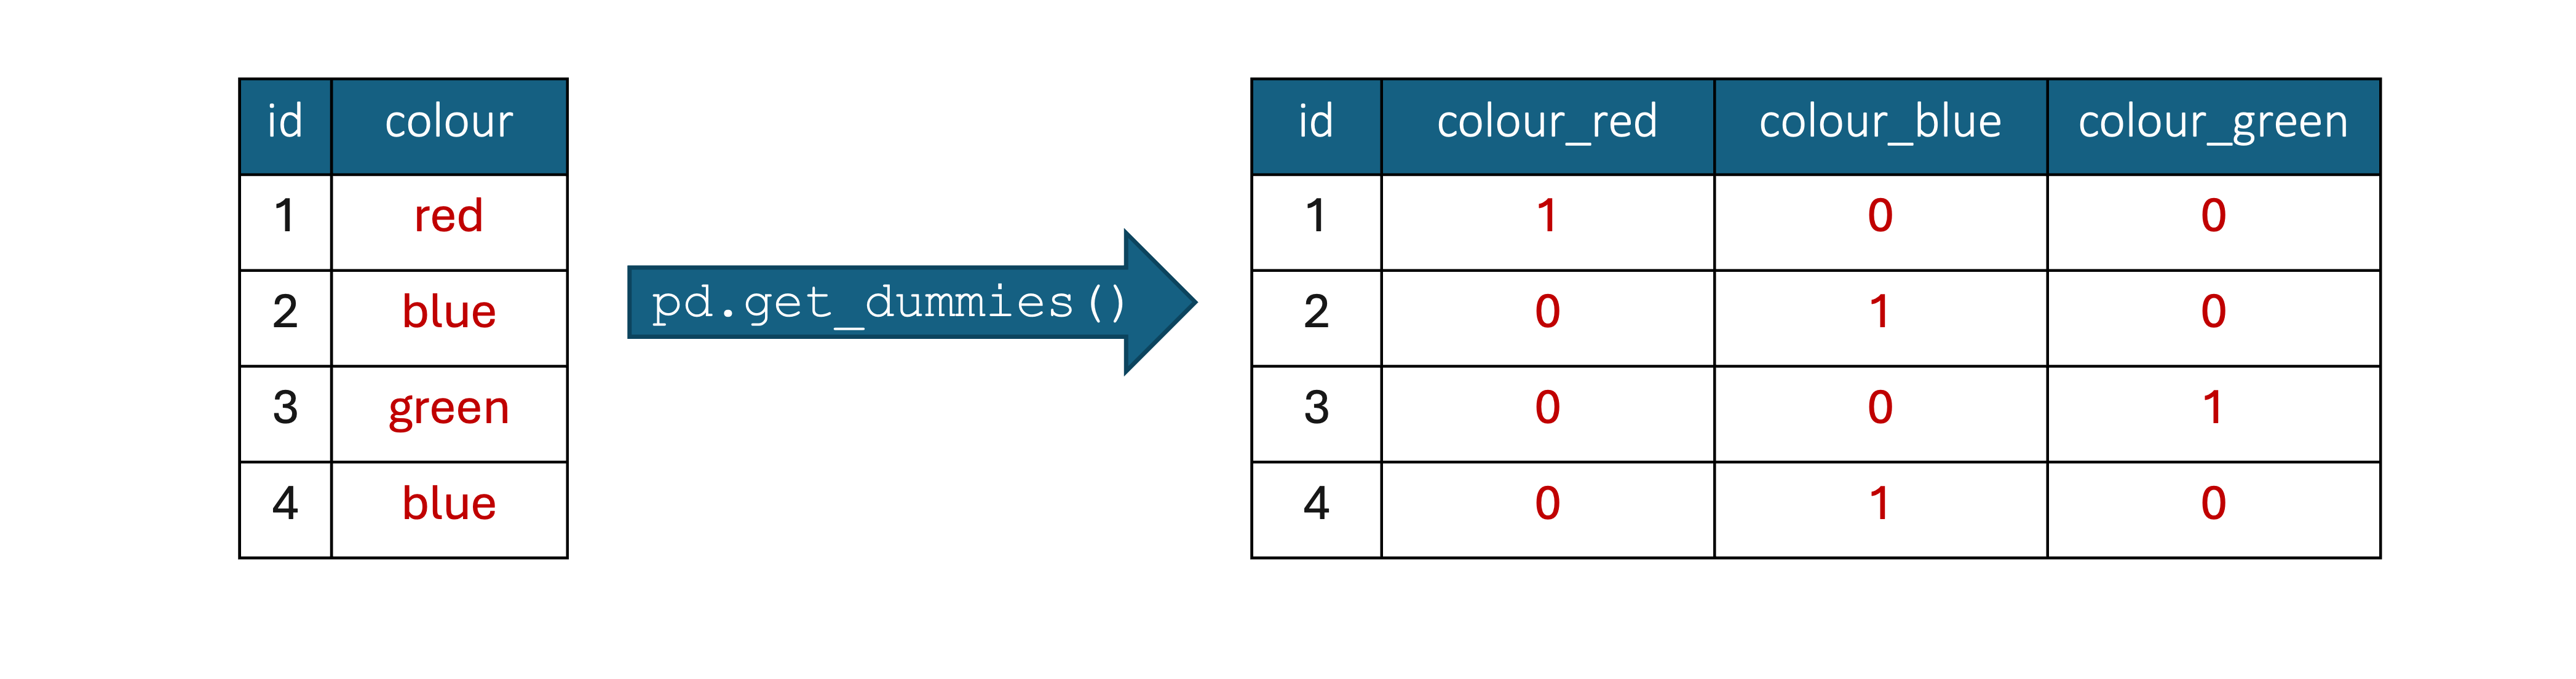

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    We will start by filtering our dataset to include only the features of interest that we identified during our cleaning and EDA phase.
</p>

In [33]:
# Step 1: Filter the dataframe to contain only the features of interest
selected_features = ['price', 'room_type', 'availability_30', 'availability_365', 'review_scores_rating']
final_data = data[selected_features]

In [34]:
final_data.head()

,price,room_type,availability_30,availability_365,review_scores_rating
0,100.0,Private room,30,365,-1.00
1,65.0,Entire home/apt,30,365,-1.00
2,100.0,Private room,30,365,3.67
4,160.0,Entire home/apt,23,83,-1.00
6,75.0,Private room,29,89,-1.00


In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32161 entries, 0 to 42756
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 32161 non-null  float64
 1   room_type             32161 non-null  object 
 2   availability_30       32161 non-null  int64  
 3   availability_365      32161 non-null  int64  
 4   review_scores_rating  32161 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ MB


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    The only column in our filtered dataframe that is not yet ready for the machine learning model is <code>room_type</code>. Although we observed that <code>room_type</code> has some effect on price, it is a categorical column with an object data type, which means it cannot be directly used in our analysis or machine learning model.
</p>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    To address this, we will use the <code>pd.get_dummies</code> function. It converts categorical variables into a series of binary (0 or 1) columns, each representing a unique category in the original column. This process, known as one-hot encoding, allows us to include categorical data in our machine learning models by converting them into a numerical format.
</p>


In [36]:
pd.get_dummies(final_data['room_type'])

,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
4,1,0,0,0
6,0,0,1,0
...,...,...,...,...
42752,1,0,0,0
42753,1,0,0,0
42754,1,0,0,0
42755,0,0,1,0


In [37]:
final_data['room_type']

0           Private room
1        Entire home/apt
2           Private room
4        Entire home/apt
6           Private room
              ...       
42752    Entire home/apt
42753    Entire home/apt
42754    Entire home/apt
42755       Private room
42756       Private room
Name: room_type, Length: 32161, dtype: object

In [38]:
# Saving the one hot encoded output as a dataframe called room_type_encoded
room_type_encoded = pd.get_dummies(final_data['room_type'])

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    We need to concatenate the results of our <code>get_dummies</code> function with the filtered data so that all the features are together in a single dataframe. 
</p>


In [39]:
# the code below will concat the one hot encoded DataFrame with the final data
final_data = pd.concat([final_data, room_type_encoded], axis=1)
final_data.head()

,price,room_type,availability_30,availability_365,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
0,100.0,Private room,30,365,-1.00,0,0,1,0
1,65.0,Entire home/apt,30,365,-1.00,1,0,0,0
2,100.0,Private room,30,365,3.67,0,0,1,0
4,160.0,Entire home/apt,23,83,-1.00,1,0,0,0
6,75.0,Private room,29,89,-1.00,0,0,1,0


<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    There is only one final step remaining: removing the original <code>room_type</code> column. Since we now have the one-hot encoded information in our dataframe, we no longer need the original categorical column.
</p>


In [40]:
final_data = final_data.drop('room_type', axis=1)

In [41]:
final_data.head()

,price,availability_30,availability_365,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
0,100.0,30,365,-1.00,0,0,1,0
1,65.0,30,365,-1.00,1,0,0,0
2,100.0,30,365,3.67,0,0,1,0
4,160.0,23,83,-1.00,1,0,0,0
6,75.0,29,89,-1.00,0,0,1,0


Finally after have cleaned and prepared our data, it would be a good idea to save a local copy of the final cleaned data to be used in later modelling stages. We save our DataFrame into csv file by using the `to_csv()` function

In [42]:
final_data.to_csv('final_data.csv')

<h2 style=" font-size:1.3em; font-family:Verdana">Summary </h2>

<hr style="border: 0.2px solid #504845;">

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    We covered a lot of content in this tutorial; let’s summarize the most important points:
</p>

<h3 style="font-size:1.1em; font-family:Verdana">Dealing with Missing Values</h3>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    There are a few options we can take to deal with missing data:
</p>
<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li>Drop missing records.</li>
    <li>Keep NaN missing values and use them strategically.</li>
    <li>Impute missing values using appropriate techniques such as filling with mean, median, or mode.</li>
</ul>

<h3 style="font-size:1.1em; font-family:Verdana">Exploratory Data Analysis</h3>
<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    There are several ways to approach Exploratory Data Analysis (EDA):
</p>
<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li>Examine the data as a whole: what is the shape, size, dtypes and structure of the data?</li>
    <li>Examine each field/feature/variable individually to understand its distribution and unique characteristics.</li>
    <li>Examine pairs of related features (e.g., analysing the relationship between price and room type).</li>
</ul>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Along the way, we can:
</p>
<ul style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    <li>Visualize or summarize the data to uncover patterns and insights.</li>
    <li>Identify and address anomalies to ensure data quality.</li>
    <li>Apply data transformations and corrections as needed (we’ll cover more advanced techniques in unit 5).</li>
</ul>

<p style="font-size:1.2em; font-family:Helvetica; line-height: 1.7em">
    Recording everything you do is crucial! Documenting your work in Jupyter Notebook promotes reproducibility of your own work, making it easier to revisit and share your analysis.
</p>
